In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data

df=pd.read_csv('SpamBase_withoutdupl_norm_40.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att49,att50,att51,att52,att53,att54,att55,att56,att57,outlier
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1


In [3]:
# df to values
df = df.values

In [4]:
#   CascadeExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/SpamBase.json")  
gc = GCForest(config)

In [5]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,57]
X = df[:,0:57]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# count class
len(np.unique(y_train))

2

In [7]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-31 01:33:21,680][cascade_classifier.fit_transform] X_groups_train.shape=[(2944, 57)],y_train.shape=(2944,),X_groups_test.shape=[(1263, 57)],y_test.shape=(1263,)
[ 2018-07-31 01:33:21,682][cascade_classifier.fit_transform] group_dims=[57]
[ 2018-07-31 01:33:21,683][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:21,684][cascade_classifier.fit_transform] group_ends=[57]
[ 2018-07-31 01:33:21,685][cascade_classifier.fit_transform] X_train.shape=(2944, 57),X_test.shape=(1263, 57)
[ 2018-07-31 01:33:21,686][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2944, 57), X_cur_test.shape=(1263, 57)
[ 2018-07-31 01:33:22,465][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.56%
[ 2018-07-31 01:33:23,369][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.56%
[ 2018-07-31 01:33:24,237][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [8]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:33:30,264][cascade_classifier.transform] X_groups_test.shape=[(1263, 57)]
[ 2018-07-31 01:33:30,266][cascade_classifier.transform] group_dims=[57]
[ 2018-07-31 01:33:30,267][cascade_classifier.transform] X_test.shape=(1263, 57)
[ 2018-07-31 01:33:30,269][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1263, 57)


Test Accuracy of CascadeExtraTrees = 95.091053 %
[[709  29]
 [ 33 492]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263



In [9]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-31 01:33:32,619][cascade_classifier.transform] X_groups_test.shape=[(1263, 57)]
[ 2018-07-31 01:33:32,621][cascade_classifier.transform] group_dims=[57]
[ 2018-07-31 01:33:32,622][cascade_classifier.transform] X_test.shape=(1263, 57)
[ 2018-07-31 01:33:32,624][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1263, 57)


In [10]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [11]:
X_test_new.shape

(1263, 59)

In [12]:
X_train_new.shape

(2944, 59)

In [13]:
# Cascade ExtraTrees
config = load_json("./examples/SpamBasegc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-31 01:33:35,003][cascade_classifier.fit_transform] X_groups_train.shape=[(2944, 59)],y_train.shape=(2944,),X_groups_test.shape=[(1263, 59)],y_test.shape=(1263,)
[ 2018-07-31 01:33:35,004][cascade_classifier.fit_transform] group_dims=[59]
[ 2018-07-31 01:33:35,005][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:35,007][cascade_classifier.fit_transform] group_ends=[59]
[ 2018-07-31 01:33:35,008][cascade_classifier.fit_transform] X_train.shape=(2944, 59),X_test.shape=(1263, 59)
[ 2018-07-31 01:33:35,010][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2944, 59), X_cur_test.shape=(1263, 59)
[ 2018-07-31 01:33:35,744][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.56%
[ 2018-07-31 01:33:36,668][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.24%
[ 2018-07-31 01:33:37,538][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [14]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:34:12,342][cascade_classifier.transform] X_groups_test.shape=[(1263, 59)]
[ 2018-07-31 01:34:12,343][cascade_classifier.transform] group_dims=[59]
[ 2018-07-31 01:34:12,346][cascade_classifier.transform] X_test.shape=(1263, 59)
[ 2018-07-31 01:34:12,347][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1263, 59)


Test Accuracy of CascadeExtraTrees = 95.170230 %
[[706  32]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263



In [15]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/SpamBasegc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-31 01:34:14,768][cascade_classifier.fit_transform] X_groups_train.shape=[(2944, 59)],y_train.shape=(2944,),X_groups_test.shape=[(1263, 59)],y_test.shape=(1263,)
[ 2018-07-31 01:34:14,770][cascade_classifier.fit_transform] group_dims=[59]
[ 2018-07-31 01:34:14,771][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:34:14,772][cascade_classifier.fit_transform] group_ends=[59]
[ 2018-07-31 01:34:14,773][cascade_classifier.fit_transform] X_train.shape=(2944, 59),X_test.shape=(1263, 59)
[ 2018-07-31 01:34:14,775][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2944, 59), X_cur_test.shape=(1263, 59)
[ 2018-07-31 01:34:15,548][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:34:16,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.56%
[ 2018-07-31 01:34:17,485][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

[ 2018-07-31 01:34:55,063][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=93.22%
[ 2018-07-31 01:34:55,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=93.56%
[ 2018-07-31 01:34:56,833][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=96.27%
[ 2018-07-31 01:34:57,733][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=94.56%
[ 2018-07-31 01:34:58,636][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=93.20%
[ 2018-07-31 01:34:59,540][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:35:00,449][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=95.58%
[ 2018-07-31 01:35:01,356][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.90%


('Test Accuracy of CascadeExtraTrees = 94.853523 %', 'Layer :', 0)
[[705  33]
 [ 32 493]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '66.536', ' seconds')


[ 2018-07-31 01:35:31,526][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:35:32,430][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.58%
[ 2018-07-31 01:35:33,331][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.95%
[ 2018-07-31 01:35:34,241][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=94.24%
[ 2018-07-31 01:35:35,130][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.88%
[ 2018-07-31 01:35:36,036][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.56%
[ 2018-07-31 01:35:36,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:35:37,797][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=92.86%


[ 2018-07-31 01:36:14,465][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.92%
[ 2018-07-31 01:36:15,377][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.60%
[ 2018-07-31 01:36:16,280][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=93.88%
[ 2018-07-31 01:36:17,190][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=93.88%
[ 2018-07-31 01:36:17,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.57%
[ 2018-07-31 01:36:17,437][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.25%
[ 2018-07-31 01:36:17,438][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.57%
[ 2018-07-31 01:36:17,439][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.25%
[ 2018-07-31 01:36:17,440][

('Test Accuracy of CascadeExtraTrees = 95.011876 %', 'Layer :', 1)
[[706  32]
 [ 31 494]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '46.729', ' seconds')


[ 2018-07-31 01:36:22,844][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.88%
[ 2018-07-31 01:36:23,726][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.58%
[ 2018-07-31 01:36:24,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.61%
[ 2018-07-31 01:36:25,483][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=94.24%
[ 2018-07-31 01:36:26,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.88%
[ 2018-07-31 01:36:27,278][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.88%
[ 2018-07-31 01:36:28,157][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:36:29,059][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.88%


[ 2018-07-31 01:37:01,856][cascade_classifier.fit_transform] X_train.shape=(2944, 59),X_test.shape=(1263, 59)
[ 2018-07-31 01:37:01,858][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2944, 59), X_cur_test.shape=(1263, 59)


('Test Accuracy of CascadeExtraTrees = 95.170230 %', 'Layer :', 2)
[[704  34]
 [ 27 498]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.94      0.95      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '37.29', ' seconds')


[ 2018-07-31 01:37:02,570][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.88%
[ 2018-07-31 01:37:03,453][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.24%
[ 2018-07-31 01:37:04,358][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.95%
[ 2018-07-31 01:37:05,240][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.56%
[ 2018-07-31 01:37:06,121][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.88%
[ 2018-07-31 01:37:07,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:37:07,940][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:37:08,820][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.54%


[ 2018-07-31 01:37:42,315][cascade_classifier.fit_transform] X_train.shape=(2944, 59),X_test.shape=(1263, 59)
[ 2018-07-31 01:37:42,317][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2944, 59), X_cur_test.shape=(1263, 59)


('Test Accuracy of CascadeExtraTrees = 94.853523 %', 'Layer :', 3)
[[703  35]
 [ 30 495]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.93      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '38.041', ' seconds')


[ 2018-07-31 01:37:43,086][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.22%
[ 2018-07-31 01:37:44,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.22%
[ 2018-07-31 01:37:45,150][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.95%
[ 2018-07-31 01:37:46,203][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=91.86%
[ 2018-07-31 01:37:47,267][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.20%
[ 2018-07-31 01:37:48,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:37:49,232][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:37:50,133][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.54%


[ 2018-07-31 01:38:25,989][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:38:26,893][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.26%
[ 2018-07-31 01:38:27,849][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.22%
[ 2018-07-31 01:38:28,711][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=92.86%
[ 2018-07-31 01:38:28,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.70%
[ 2018-07-31 01:38:28,962][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.62%
[ 2018-07-31 01:38:28,963][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.70%
[ 2018-07-31 01:38:28,965][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.62%
[ 2018-07-31 01:38:28,967][

('Test Accuracy of CascadeExtraTrees = 94.932700 %', 'Layer :', 4)
[[704  34]
 [ 30 495]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '55.969', ' seconds')


[ 2018-07-31 01:38:46,240][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.22%
[ 2018-07-31 01:38:47,218][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=92.54%
[ 2018-07-31 01:38:48,201][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.63%
[ 2018-07-31 01:38:49,188][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=92.88%
[ 2018-07-31 01:38:50,260][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=94.22%
[ 2018-07-31 01:38:51,292][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:38:52,173][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:38:53,084][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.20%


[ 2018-07-31 01:39:28,104][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.92%
[ 2018-07-31 01:39:29,133][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=95.24%
[ 2018-07-31 01:39:30,042][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.22%
[ 2018-07-31 01:39:30,947][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.22%
[ 2018-07-31 01:39:31,182][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.57%
[ 2018-07-31 01:39:31,183][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.85%
[ 2018-07-31 01:39:31,185][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.57%
[ 2018-07-31 01:39:31,186][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.85%
[ 2018-07-31 01:39:31,187][

('Test Accuracy of CascadeExtraTrees = 94.457641 %', 'Layer :', 5)
[[697  41]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.94      0.95       738
        1.0       0.92      0.94      0.93       525

avg / total       0.94      0.94      0.94      1263

(' Time ', '45.82', ' seconds')


[ 2018-07-31 01:39:36,601][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.22%
[ 2018-07-31 01:39:37,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.24%
[ 2018-07-31 01:39:38,380][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.61%
[ 2018-07-31 01:39:39,294][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=92.54%
[ 2018-07-31 01:39:40,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.54%
[ 2018-07-31 01:39:41,215][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.88%
[ 2018-07-31 01:39:42,226][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.94%
[ 2018-07-31 01:39:43,323][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=92.52%


[ 2018-07-31 01:40:19,593][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:40:20,618][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.60%
[ 2018-07-31 01:40:21,775][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.22%
[ 2018-07-31 01:40:23,090][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.22%
[ 2018-07-31 01:40:23,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.77%
[ 2018-07-31 01:40:23,313][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.25%
[ 2018-07-31 01:40:23,316][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.77%
[ 2018-07-31 01:40:23,318][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.25%
[ 2018-07-31 01:40:23,321][

('Test Accuracy of CascadeExtraTrees = 95.249406 %', 'Layer :', 6)
[[708  30]
 [ 30 495]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '67.424', ' seconds')


[ 2018-07-31 01:40:53,589][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.88%
[ 2018-07-31 01:40:54,482][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.24%
[ 2018-07-31 01:40:55,348][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.27%
[ 2018-07-31 01:40:56,270][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=94.24%
[ 2018-07-31 01:40:57,143][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.54%
[ 2018-07-31 01:40:58,089][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.54%
[ 2018-07-31 01:40:58,960][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:40:59,839][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=92.86%


[ 2018-07-31 01:41:31,973][cascade_classifier.fit_transform] X_train.shape=(2944, 59),X_test.shape=(1263, 59)
[ 2018-07-31 01:41:31,974][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2944, 59), X_cur_test.shape=(1263, 59)


('Test Accuracy of CascadeExtraTrees = 95.011876 %', 'Layer :', 7)
[[705  33]
 [ 30 495]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '36.7', ' seconds')


[ 2018-07-31 01:41:32,796][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:41:33,739][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.90%
[ 2018-07-31 01:41:34,662][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.61%
[ 2018-07-31 01:41:35,563][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=92.88%
[ 2018-07-31 01:41:36,468][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.54%
[ 2018-07-31 01:41:37,345][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.88%
[ 2018-07-31 01:41:38,267][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=95.92%
[ 2018-07-31 01:41:39,170][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=92.18%


[ 2018-07-31 01:42:15,362][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=94.90%
[ 2018-07-31 01:42:16,251][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.26%
[ 2018-07-31 01:42:17,178][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=93.20%
[ 2018-07-31 01:42:18,040][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=93.54%
[ 2018-07-31 01:42:18,280][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.29%
[ 2018-07-31 01:42:18,281][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.33%
[ 2018-07-31 01:42:18,283][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.29%
[ 2018-07-31 01:42:18,284][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.33%
[ 2018-07-31 01:42:18,286][

('Test Accuracy of CascadeExtraTrees = 95.328583 %', 'Layer :', 8)
[[708  30]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '55.937', ' seconds')


[ 2018-07-31 01:42:35,631][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:42:36,624][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.24%
[ 2018-07-31 01:42:37,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.61%
[ 2018-07-31 01:42:38,706][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.56%
[ 2018-07-31 01:42:39,720][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.86%
[ 2018-07-31 01:42:40,592][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:42:41,665][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:42:42,730][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.20%


[ 2018-07-31 01:43:18,881][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.24%
[ 2018-07-31 01:43:19,740][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.26%
[ 2018-07-31 01:43:20,780][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.22%
[ 2018-07-31 01:43:21,904][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.90%
[ 2018-07-31 01:43:22,112][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.57%
[ 2018-07-31 01:43:22,113][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.01%
[ 2018-07-31 01:43:22,114][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.57%
[ 2018-07-31 01:43:22,116][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.01%
[ 2018-07-31 01:43:22,118][

('Test Accuracy of CascadeExtraTrees = 95.011876 %', 'Layer :', 9)
[[705  33]
 [ 30 495]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '67.161', ' seconds')


[ 2018-07-31 01:43:52,414][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:43:53,290][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=94.24%
[ 2018-07-31 01:43:54,149][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.95%
[ 2018-07-31 01:43:55,145][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=94.24%
[ 2018-07-31 01:43:56,017][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.86%
[ 2018-07-31 01:43:56,904][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.56%
[ 2018-07-31 01:43:57,902][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.94%
[ 2018-07-31 01:43:58,911][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.54%


[ 2018-07-31 01:44:34,397][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:44:35,259][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.26%
[ 2018-07-31 01:44:36,141][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.56%
[ 2018-07-31 01:44:37,038][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=95.24%
[ 2018-07-31 01:44:37,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.94%
[ 2018-07-31 01:44:37,272][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.85%
[ 2018-07-31 01:44:37,273][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.94%
[ 2018-07-31 01:44:37,275][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.85%
[ 2018-07-31 01:44:37,276][

('Test Accuracy of CascadeExtraTrees = 94.853523 %', 'Layer :', 10)
[[702  36]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.93      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '45.685', ' seconds')


[ 2018-07-31 01:44:42,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=94.24%
[ 2018-07-31 01:44:43,704][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.90%
[ 2018-07-31 01:44:44,728][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.95%
[ 2018-07-31 01:44:45,785][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.90%
[ 2018-07-31 01:44:46,760][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.18%
[ 2018-07-31 01:44:47,763][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:44:48,741][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.28%
[ 2018-07-31 01:44:49,699][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.20%


[ 2018-07-31 01:45:21,551][cascade_classifier.fit_transform] X_train.shape=(2944, 59),X_test.shape=(1263, 59)
[ 2018-07-31 01:45:21,552][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2944, 59), X_cur_test.shape=(1263, 59)


('Test Accuracy of CascadeExtraTrees = 94.774347 %', 'Layer :', 11)
[[701  37]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.93      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '37.241', ' seconds')


[ 2018-07-31 01:45:22,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:45:23,390][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.90%
[ 2018-07-31 01:45:24,268][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.95%
[ 2018-07-31 01:45:25,199][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.90%
[ 2018-07-31 01:45:26,106][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.52%
[ 2018-07-31 01:45:26,963][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:45:27,852][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:45:28,975][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.54%


[ 2018-07-31 01:46:07,910][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:46:08,783][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=95.92%
[ 2018-07-31 01:46:09,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.56%
[ 2018-07-31 01:46:10,792][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=95.24%
[ 2018-07-31 01:46:11,021][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.77%
[ 2018-07-31 01:46:11,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.93%
[ 2018-07-31 01:46:11,024][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.77%
[ 2018-07-31 01:46:11,025][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.93%
[ 2018-07-31 01:46:11,027][

('Test Accuracy of CascadeExtraTrees = 95.011876 %', 'Layer :', 12)
[[702  36]
 [ 27 498]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.93      0.95      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '70.459', ' seconds')


[ 2018-07-31 01:46:42,325][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=94.24%
[ 2018-07-31 01:46:43,302][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.56%
[ 2018-07-31 01:46:44,256][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.27%
[ 2018-07-31 01:46:45,332][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.90%
[ 2018-07-31 01:46:46,466][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.18%
[ 2018-07-31 01:46:47,636][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:46:48,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:46:49,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.54%


[ 2018-07-31 01:47:27,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:47:28,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=95.58%
[ 2018-07-31 01:47:29,809][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.90%
[ 2018-07-31 01:47:30,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.90%
[ 2018-07-31 01:47:30,913][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.67%
[ 2018-07-31 01:47:30,914][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.01%
[ 2018-07-31 01:47:30,916][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.67%
[ 2018-07-31 01:47:30,917][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.01%
[ 2018-07-31 01:47:30,918][

('Test Accuracy of CascadeExtraTrees = 94.853523 %', 'Layer :', 13)
[[702  36]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.93      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '49.433', ' seconds')


[ 2018-07-31 01:47:36,149][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:47:37,037][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.22%
[ 2018-07-31 01:47:37,948][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=95.59%
[ 2018-07-31 01:47:38,856][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.90%
[ 2018-07-31 01:47:39,779][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.86%
[ 2018-07-31 01:47:40,651][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.88%
[ 2018-07-31 01:47:41,542][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=95.92%
[ 2018-07-31 01:47:42,513][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.20%


[ 2018-07-31 01:48:19,136][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:48:19,885][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.26%
[ 2018-07-31 01:48:20,861][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.56%
[ 2018-07-31 01:48:21,756][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.90%
[ 2018-07-31 01:48:21,994][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.53%
[ 2018-07-31 01:48:21,995][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.93%
[ 2018-07-31 01:48:21,997][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.53%
[ 2018-07-31 01:48:21,998][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.93%
[ 2018-07-31 01:48:21,999][

('Test Accuracy of CascadeExtraTrees = 94.932700 %', 'Layer :', 14)
[[703  35]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.93      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '46.403', ' seconds')


[ 2018-07-31 01:48:27,329][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.22%
[ 2018-07-31 01:48:28,170][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.22%
[ 2018-07-31 01:48:29,136][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=95.93%
[ 2018-07-31 01:48:29,989][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.56%
[ 2018-07-31 01:48:30,867][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=91.84%
[ 2018-07-31 01:48:31,742][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.54%
[ 2018-07-31 01:48:32,591][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=95.24%
[ 2018-07-31 01:48:33,461][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=92.86%


[ 2018-07-31 01:49:08,945][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:49:09,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=95.58%
[ 2018-07-31 01:49:10,725][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.22%
[ 2018-07-31 01:49:11,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.22%
[ 2018-07-31 01:49:11,830][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.33%
[ 2018-07-31 01:49:11,831][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.70%
[ 2018-07-31 01:49:11,833][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.33%
[ 2018-07-31 01:49:11,834][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.70%
[ 2018-07-31 01:49:11,835][

('Test Accuracy of CascadeExtraTrees = 95.011876 %', 'Layer :', 15)
[[704  34]
 [ 29 496]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '45.146', ' seconds')


[ 2018-07-31 01:49:17,181][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=94.58%
[ 2018-07-31 01:49:18,079][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.56%
[ 2018-07-31 01:49:18,955][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=95.59%
[ 2018-07-31 01:49:19,818][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=92.88%
[ 2018-07-31 01:49:20,680][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.52%
[ 2018-07-31 01:49:21,610][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.88%
[ 2018-07-31 01:49:22,749][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=95.58%
[ 2018-07-31 01:49:23,846][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=94.22%


[ 2018-07-31 01:49:58,779][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.92%
[ 2018-07-31 01:49:59,631][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=95.92%
[ 2018-07-31 01:50:00,497][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=93.88%
[ 2018-07-31 01:50:01,351][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=93.88%
[ 2018-07-31 01:50:01,580][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.26%
[ 2018-07-31 01:50:01,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.33%
[ 2018-07-31 01:50:01,582][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.26%
[ 2018-07-31 01:50:01,583][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.33%
[ 2018-07-31 01:50:01,585][

('Test Accuracy of CascadeExtraTrees = 95.249406 %', 'Layer :', 16)
[[708  30]
 [ 30 495]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.94      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '62.42', ' seconds')


[ 2018-07-31 01:50:28,728][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=94.58%
[ 2018-07-31 01:50:29,521][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.56%
[ 2018-07-31 01:50:30,431][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=95.59%
[ 2018-07-31 01:50:31,148][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.22%
[ 2018-07-31 01:50:32,000][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.18%
[ 2018-07-31 01:50:32,847][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.88%
[ 2018-07-31 01:50:33,709][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:50:34,542][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=93.20%


[ 2018-07-31 01:51:10,830][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:51:11,788][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.26%
[ 2018-07-31 01:51:12,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=93.54%
[ 2018-07-31 01:51:13,508][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=93.54%
[ 2018-07-31 01:51:13,743][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.23%
[ 2018-07-31 01:51:13,744][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.17%
[ 2018-07-31 01:51:13,745][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.23%
[ 2018-07-31 01:51:13,746][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.17%
[ 2018-07-31 01:51:13,748][

('Test Accuracy of CascadeExtraTrees = 95.249406 %', 'Layer :', 17)
[[706  32]
 [ 28 497]]


             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       738
        1.0       0.94      0.95      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '45.559', ' seconds')


[ 2018-07-31 01:51:18,972][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:51:19,875][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=93.56%
[ 2018-07-31 01:51:20,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=95.93%
[ 2018-07-31 01:51:21,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=92.54%
[ 2018-07-31 01:51:22,773][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=91.84%
[ 2018-07-31 01:51:23,837][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=94.22%
[ 2018-07-31 01:51:24,909][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:51:25,741][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=92.86%


[ 2018-07-31 01:51:59,560][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:52:00,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.94%
[ 2018-07-31 01:52:01,554][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=93.88%
[ 2018-07-31 01:52:02,654][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.56%
[ 2018-07-31 01:52:02,864][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.36%
[ 2018-07-31 01:52:02,865][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.25%
[ 2018-07-31 01:52:02,866][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.36%
[ 2018-07-31 01:52:02,867][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.25%
[ 2018-07-31 01:52:02,868][

('Test Accuracy of CascadeExtraTrees = 95.091053 %', 'Layer :', 18)
[[704  34]
 [ 28 497]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.94      0.95      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '44.477', ' seconds')


[ 2018-07-31 01:52:08,132][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=93.90%
[ 2018-07-31 01:52:08,978][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=92.88%
[ 2018-07-31 01:52:09,808][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=95.93%
[ 2018-07-31 01:52:10,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.22%
[ 2018-07-31 01:52:11,507][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=92.52%
[ 2018-07-31 01:52:12,336][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=93.88%
[ 2018-07-31 01:52:13,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.60%
[ 2018-07-31 01:52:13,915][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=92.86%


[ 2018-07-31 01:52:49,894][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=96.26%
[ 2018-07-31 01:52:50,805][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.26%
[ 2018-07-31 01:52:51,806][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=94.90%
[ 2018-07-31 01:52:52,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=94.22%
[ 2018-07-31 01:52:52,938][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=94.40%
[ 2018-07-31 01:52:52,940][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.85%
[ 2018-07-31 01:52:52,941][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.40%
[ 2018-07-31 01:52:52,942][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.85%
[ 2018-07-31 01:52:52,944][

('Test Accuracy of CascadeExtraTrees = 94.853523 %', 'Layer :', 19)
[[701  37]
 [ 28 497]]


             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       738
        1.0       0.93      0.95      0.94       525

avg / total       0.95      0.95      0.95      1263

(' Time ', '71.053', ' seconds')


('Opt_Cascade_num =', 8, ' Accuracy =', 95.33, 'Time =', 450.44999999999999)


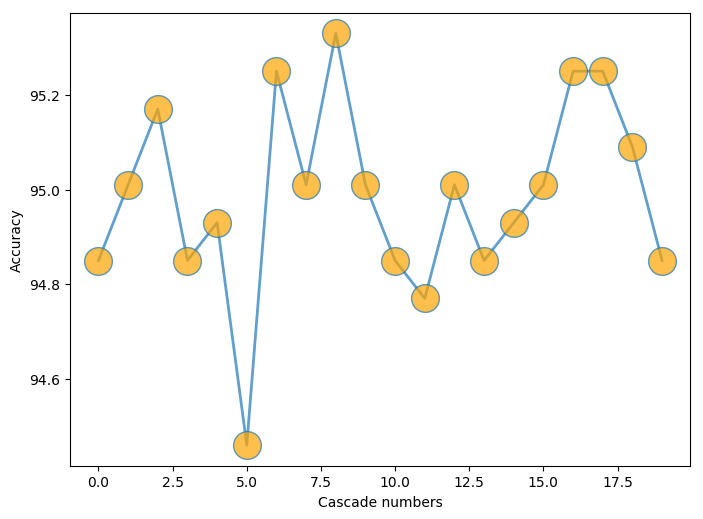

In [16]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [17]:
Accuracy

[94.85,
 95.01,
 95.17,
 94.85,
 94.93,
 94.46,
 95.25,
 95.01,
 95.33,
 95.01,
 94.85,
 94.77,
 95.01,
 94.85,
 94.93,
 95.01,
 95.25,
 95.25,
 95.09,
 94.85]